# **CSE5ML**
## **Assignment 1**

Name: Tasnim Mubasshira Sikder Sara

ID: 21451907

### Loading Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances_argmin

### Loading Data

In [33]:
dt = pd.read_csv('income.csv')
print("dataset lenght: ", len(dt))
dt.head()

dataset lenght:  26215


,income,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week
0,0,39,State-gov,Bachelors,NotMarried,Adm-clerical,Not-in-family,White,Male,40
1,0,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,13
2,0,38,Private,HS-grad,Separated,Handlers-cleaners,Not-in-family,White,Male,40
3,0,53,Private,11th,Married,Handlers-cleaners,Husband,Black,Male,40
4,0,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40


In [35]:
print(dt.shape)
print(dt.dtypes)

(26215, 10)
income             int64
age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
hours-per-week     int64
dtype: object


### Preparing dataset

Checking for null valuess

In [36]:
dt.isna().sum()

,0
income,0
age,0
workclass,1396
education,0
marital-status,0
occupation,1401
relationship,0
race,0
sex,0
hours-per-week,0


In [37]:
dt = dt.dropna()
print("dataset length:", len(dt))

dataset length: 24814


Checking for duplicates

In [ ]:
dt.duplicated().any()

True

In [38]:
dt = dt.drop_duplicates()
print("dataset length:", len(dt))

dataset length: 21537


Handling categorical variables

In [ ]:
print(dt.education.value_counts(),"\n")

education
HS-grad         6442
Some-college    4668
Bachelors       3701
Masters         1324
Assoc-voc       1007
Assoc-acdm       814
11th             718
10th             592
Prof-school      487
7th-8th          427
Doctorate        356
9th              355
12th             296
5th-6th          212
1st-4th          104
Preschool         34
Name: count, dtype: int64 



In [39]:
dt['education'] = dt['education'].replace({'Preschool': 1, '1st-4th': 2, '5th-6th': 3,
                                           '7th-8th': 4, '9th': 5, '10th': 6, '11th': 7,
                                           '12th': 8, 'HS-grad': 9, 'Some-college': 10,
                                           'Assoc-voc': 11, 'Assoc-acdm': 12, 'Bachelors': 13,
                                           'Masters': 14, 'Prof-school': 15, 'Doctorate': 16})
dt.head()

,income,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week
0,0,39,State-gov,13,NotMarried,Adm-clerical,Not-in-family,White,Male,40
1,0,50,Self-emp-not-inc,13,Married,Exec-managerial,Husband,White,Male,13
2,0,38,Private,9,Separated,Handlers-cleaners,Not-in-family,White,Male,40
3,0,53,Private,7,Married,Handlers-cleaners,Husband,Black,Male,40
4,0,28,Private,13,Married,Prof-specialty,Wife,Black,Female,40


Check value count for categorical variable

In [8]:
print(dt["sex"].value_counts(),"\n")
print(dt["workclass"].value_counts(),"\n")
print(dt["marital-status"].value_counts(), "\n")
print(dt["occupation"].value_counts(), "\n")
print(dt["relationship"].value_counts(), "\n")
print(dt["race"].value_counts(), "\n")

sex
Male      14524
Female     7013
Name: count, dtype: int64 

workclass
Private             15108
Self-emp-not-inc     1999
Local-gov            1656
State-gov            1021
Self-emp-inc          951
Federal-gov           793
Without-pay             9
Name: count, dtype: int64 

marital-status
Married       10291
NotMarried     6752
Separated      3848
Widowed         646
Name: count, dtype: int64 

occupation
Prof-specialty       3212
Exec-managerial      3017
Sales                2597
Adm-clerical         2589
Craft-repair         2489
Other-service        2244
Machine-op-inspct    1302
Transport-moving     1136
Handlers-cleaners     862
Farming-fishing       752
Tech-support          692
Protective-serv       522
Priv-house-serv       118
Armed-Forces            5
Name: count, dtype: int64 

relationship
Husband           8928
Not-in-family     5563
Own-child         2811
Unmarried         2376
Wife              1185
Other-relative     674
Name: count, dtype: int64 

race
White 

In [40]:
dt['sex'] = dt['sex'].replace({'Male': 0, 'Female': 1})

In [41]:
dt = pd.get_dummies(dt, columns=['occupation', 'workclass', 'race', 'relationship', 'marital-status'])

In [42]:
dt.head()

,income,age,education,sex,hours-per-week,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital-status_Married,marital-status_NotMarried,marital-status_Separated,marital-status_Widowed
0,0,39,13,0,40,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,0,50,13,0,13,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,0,38,9,0,40,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,0,53,7,0,40,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,0,28,13,1,40,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [12]:
dt.columns

Index(['income', 'age', 'education', 'sex', 'hours-per-week',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'marit

In [43]:
# making sure all the variables are integar
dt = dt.astype(int)

In [44]:
dt.head()

,income,age,education,sex,hours-per-week,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital-status_Married,marital-status_NotMarried,marital-status_Separated,marital-status_Widowed
0,0,39,13,0,40,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,50,13,0,13,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0,38,9,0,40,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,53,7,0,40,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,28,13,1,40,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


## Checking Correlation and Reducing Dimensions

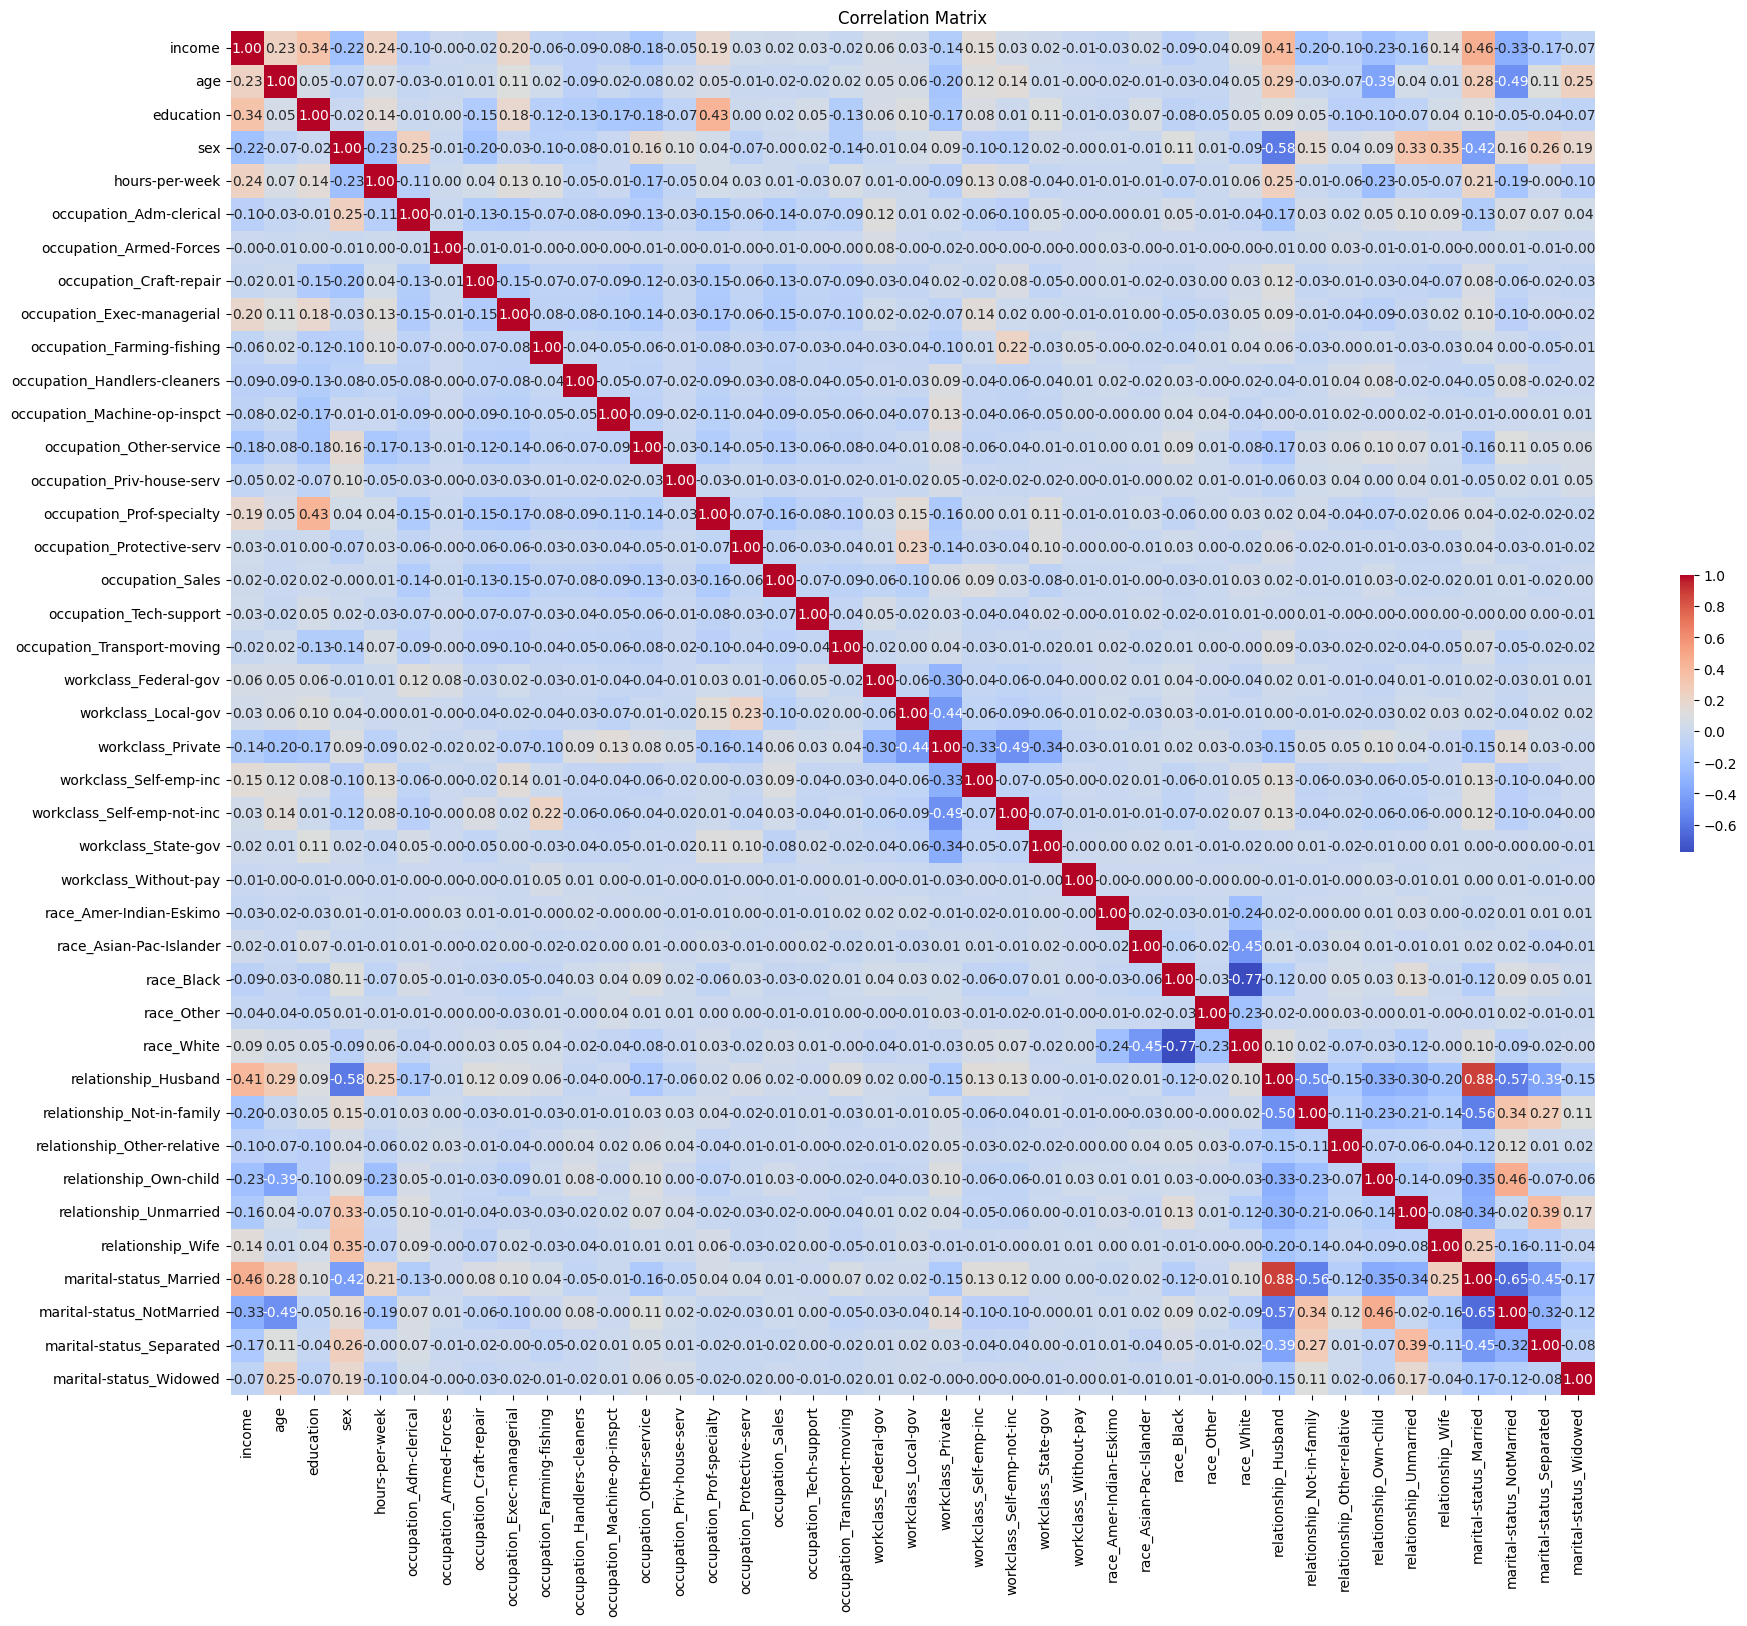

In [45]:
correlation_matrix = dt.corr()

# Plotting the heatmap
plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .2})
plt.title('Correlation Matrix')
plt.show()

Dimensionality reduction

In [46]:
columns_to_drop = ['marital-status_NotMarried', 'relationship_Husband', 'race_Black']

In [47]:
dt_reduced = dt.drop(columns=columns_to_drop)

In [48]:
dt.shape

(21537, 41)

Define input and target variables

In [49]:
array = dt.values
X = array[:,1:40]
y = array[:,0]

## Split dataset

In [50]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform y to make it numeric
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19383, 39)
(2154, 39)
(19383,)
(2154,)


Normalisation on training and testing

In [52]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

# Classification models

## Logistic regression and SVM

In [53]:
# logistic regression model, parameters can be changed
model = LogisticRegression(solver="liblinear")
model.fit(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
print("Testing Accuracy of LR:", test_score)

# Support Vector Machine for classification, parameters can be changed
model = SVC()
model.fit(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
print("Testing Accuracy of SVC:", test_score)

Testing Accuracy of LR: 0.8101207056638812
Testing Accuracy of SVC: 0.7952646239554317


LR accuracy rate 81%

SVM accuracy rate 79.6%

# 10-fold cross-validation

In [26]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7) #set 10-fold cross validation after shuffle the dataset with random seed 7

In [27]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(solver="liblinear")
results = cross_val_score(model, X_train_norm, y_train, cv=kfold)
print("Average Accuracy of LR:",results.mean())

model = SVC()
results = cross_val_score(model, X_train_norm, y_train, cv=kfold)
print("Average Accuracy of SVM:",results.mean())

Average Accuracy of LR: 0.8057058126309615
Average Accuracy of SVM: 0.7965742557710904


LR accuracy rate 80.57%

SVM accuracy rate 79.66%

In [28]:
results

array([0.80608561, 0.7937081 , 0.79112945, 0.79102167, 0.79772962,
       0.80082559, 0.80237358, 0.79721362, 0.79669763, 0.78895769])

## Optimize LR

In [29]:
grid_params_lr = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10],
    'solver': ['saga', 'liblinear']
}

lr = LogisticRegression(max_iter=150)
gs_lr_result = GridSearchCV(lr, grid_params_lr, cv=kfold).fit(X_train_norm, y_train)
print(gs_lr_result.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

0.8057058126309615


Evaluate the trained Logistic Regression model using testing dataset

In [30]:
test_accuracy = gs_lr_result.best_estimator_.score(X_test_norm, y_test)
print("Accuracy in testing:", test_accuracy)

Accuracy in testing: 0.8110492107706593


check the parameter setting for the best selected model

In [31]:
gs_lr_result.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

## Optimize the SVM models


In [32]:
grid_params_svc = {
    'kernel': ['linear', 'poly'],
    'C': [1, 10],
    'degree': [3, 8],
    'gamma': ['auto','scale']
}

svc = SVC()
gs_svc_result = GridSearchCV(svc, grid_params_svc, cv=kfold).fit(X_train_norm, y_train)
print(gs_svc_result.best_score_)

0.8062733814787553


Evaluate the trained svm model using testing dataset

In [54]:
test_accuracy = gs_svc_result.best_estimator_.score(X_test_norm, y_test)
print("Accuracy in testing:", test_accuracy)

Accuracy in testing: 0.7381615598885793


check the parameter setting for the best selected model

In [55]:
gs_lr_result.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

# K-means Clustering

In [83]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [84]:
unique_labels, unique_counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique_labels, unique_counts))

{0: 10124, 1: 9259}

#### Extract prototype for each cluster

In [90]:
kmeans_cluster_centers = kmeans.cluster_centers_
closest = pairwise_distances_argmin(kmeans.cluster_centers_, X_train_norm)

# show the three data samples that can represent the three clusters
dt.iloc[closest, :]

,income,age,education,sex,hours-per-week,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital-status_Married,marital-status_NotMarried,marital-status_Separated,marital-status_Widowed
20243,0,42,9,0,50,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
19208,0,19,9,0,15,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


#### Check accuracy of the clustering model

In [86]:
from sklearn.metrics import accuracy_score

#y = array[:, 0]
y = array[:len(kmeans_labels), 0]
kmeans_labels = kmeans.labels_

In [87]:
accuracy = accuracy_score(y, kmeans_labels)
print("k means prediction accuracy:", accuracy)

k means prediction accuracy: 0.5110148067894547
